### Reference
EIN and NAME—Identification columns <br>
APPLICATION_TYPE—Alphabet Soup application type <br>
AFFILIATION—Affiliated sector of industry <br>
CLASSIFICATION—Government organization classification <br>
USE_CASE—Use case for funding <br>
ORGANIZATION—Organization type <br>
STATUS—Active status <br>
INCOME_AMT—Income classification <br>
SPECIAL_CONSIDERATIONS—Special considerations for application <br>
ASK_AMT—Funding amount requested <br>
IS_SUCCESSFUL—Was the money used effectively <br>

## Preprocessing

In [68]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [46]:
# categorical = APPLICATION_TYPE, AFFILIATION, CLASSIFICATION, USE_CASE, ORGANIZATION, 'INCOME_AMT,' SPECIAL_CONSIDERATIONS

In [47]:
application_df.shape

(34299, 12)

In [48]:
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [49]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df.head(1)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1


In [50]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [51]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
value_counts_APPTYPE = application_df['APPLICATION_TYPE'].value_counts()
value_counts_APPTYPE

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [52]:
# [print(APPTYPE) for x in application_df['APPLICATION_TYPE'].value_counts() if x<50]

[print(APPTYPE) for APPTYPE, count in zip(value_counts_APPTYPE.index, value_counts_APPTYPE.values) if count<50]

T12
T2
T25
T14
T29
T15
T17


[None, None, None, None, None, None, None]

In [53]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = []
[application_types_to_replace.append(APPTYPE) for APPTYPE, count in zip(value_counts_APPTYPE.index, value_counts_APPTYPE.values) if count<50]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: count, dtype: int64

In [54]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
value_counts_CLASS = application_df['CLASSIFICATION'].value_counts()
print(list(zip(value_counts_CLASS.index, value_counts_CLASS.values)))

[('C1000', 17326), ('C2000', 6074), ('C1200', 4837), ('C3000', 1918), ('C2100', 1883), ('C7000', 777), ('C1700', 287), ('C4000', 194), ('C5000', 116), ('C1270', 114), ('C2700', 104), ('C2800', 95), ('C7100', 75), ('C1300', 58), ('C1280', 50), ('C1230', 36), ('C1400', 34), ('C7200', 32), ('C2300', 32), ('C1240', 30), ('C8000', 20), ('C7120', 18), ('C1500', 16), ('C1800', 15), ('C6000', 15), ('C1250', 14), ('C8200', 11), ('C1238', 10), ('C1278', 10), ('C1235', 9), ('C1237', 9), ('C7210', 7), ('C2400', 6), ('C1720', 6), ('C4100', 6), ('C1257', 5), ('C1600', 5), ('C1260', 3), ('C2710', 3), ('C0', 3), ('C3200', 2), ('C1234', 2), ('C1246', 2), ('C1267', 2), ('C1256', 2), ('C2190', 1), ('C4200', 1), ('C2600', 1), ('C5200', 1), ('C1370', 1), ('C1248', 1), ('C6100', 1), ('C1820', 1), ('C1900', 1), ('C1236', 1), ('C3700', 1), ('C2570', 1), ('C1580', 1), ('C1245', 1), ('C2500', 1), ('C1570', 1), ('C1283', 1), ('C2380', 1), ('C1732', 1), ('C1728', 1), ('C2170', 1), ('C4120', 1), ('C8210', 1), ('C2

In [55]:
application_df.nunique()

APPLICATION_TYPE            11
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [56]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []
[classifications_to_replace.append(CLASSTYPE) for CLASSTYPE, count in zip(value_counts_CLASS.index, value_counts_CLASS.values) if count < 190]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: count, dtype: int64

In [57]:
application_df.nunique()

APPLICATION_TYPE            11
AFFILIATION                  6
CLASSIFICATION               9
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [58]:
application_df['INCOME_AMT'] =application_df['INCOME_AMT'].astype("string")

In [59]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_series = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION','INCOME_AMT', 'SPECIAL_CONSIDERATIONS']
application_df_dummies = pd.get_dummies(application_df, columns=categorical_series)
application_df_dummies.nunique()


STATUS                             2
ASK_AMT                         8747
IS_SUCCESSFUL                      2
APPLICATION_TYPE_Other             2
APPLICATION_TYPE_T10               2
APPLICATION_TYPE_T13               2
APPLICATION_TYPE_T19               2
APPLICATION_TYPE_T3                2
APPLICATION_TYPE_T4                2
APPLICATION_TYPE_T5                2
APPLICATION_TYPE_T6                2
APPLICATION_TYPE_T7                2
APPLICATION_TYPE_T8                2
APPLICATION_TYPE_T9                2
AFFILIATION_CompanySponsored       2
AFFILIATION_Family/Parent          2
AFFILIATION_Independent            2
AFFILIATION_National               2
AFFILIATION_Other                  2
AFFILIATION_Regional               2
CLASSIFICATION_C1000               2
CLASSIFICATION_C1200               2
CLASSIFICATION_C1700               2
CLASSIFICATION_C2000               2
CLASSIFICATION_C2100               2
CLASSIFICATION_C3000               2
CLASSIFICATION_C4000               2
C

In [60]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies['IS_SUCCESSFUL'].values
target_removed_df = application_df_dummies.copy()
target_removed_df.drop(['IS_SUCCESSFUL'], axis=1)
X = target_removed_df.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [61]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [62]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [75]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 7.8597e-09
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 7.1828e-09
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 2.9882e-09
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.2767e-08
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.6973e-09
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 8.8009e-09
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 2.8676e-09
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 7.4020e-09
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.5613e-08
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.6282e-08
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 3.1183e-

804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.6445e-10
Epoch 67/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.3322e-10
Epoch 68/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 7.1447e-11
Epoch 69/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.1948e-10
Epoch 70/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 7.9970e-11
Epoch 71/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 1.0092e-10
Epoch 72/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.2070e-11
Epoch 73/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.1206e-10
Epoch 74/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 9.2264e-11
Epoch 75/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 1.4755e-10
Epoch 76/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 3.4032e-10
E

In [76]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 3ms/step - accuracy: 1.0000 - loss: 6.0058e-07
Loss: 6.005796535646368e-07, Accuracy: 1.0


In [77]:
# Export our model to HDF5 file - AlphabetSoupCharity.h5
nn.save('AlphabetSoupCharity.h5')

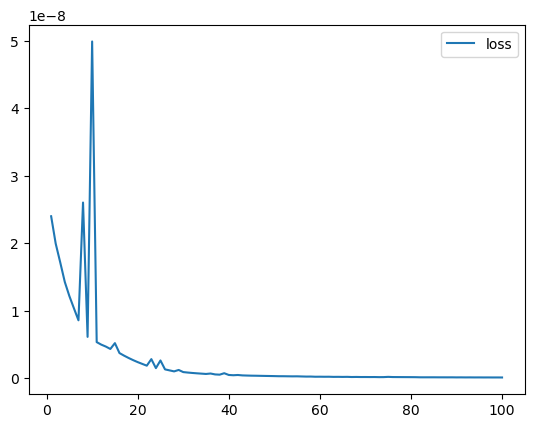

In [78]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

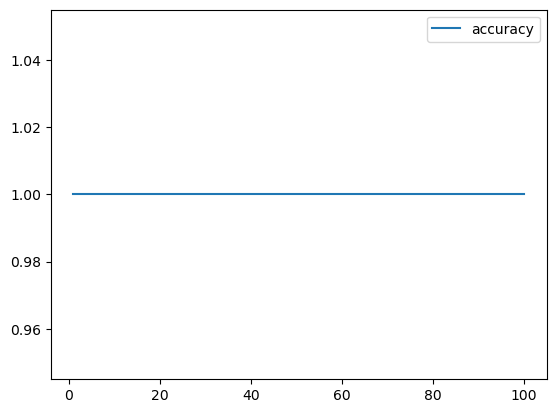

In [79]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()